# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
def f(x):
  return x ** 2

def dfdx(x):
  return 2 * x

In [ ]:
dfdx(10)

20

In [ ]:
import sympy as sp

In [ ]:
x_s = sp.symbols('x')
F_s = x_s ** 2; F_s

x**2

In [ ]:
dfdx_s = sp.diff(F_s); dfdx_s

2*x

In [ ]:
dfdx_s.evalf(subs={'x':10})

20.0000000000000

In [ ]:
def dfdx_n(f, x, h=1e-6):
  return (f(x+h) - f(x)) / h

In [ ]:
dfdx_n(f, 10)

20.00000098689725

In [ ]:
import torch as th

In [ ]:
x = th.tensor(5.0, requires_grad=True)
y = f(x)
# z = y + 5
# t = z * 2
y.backward()
x.grad

tensor(10.)

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
z = y.sum() # x1^2 + x2^2 + x3^3
z.backward()
x.grad # [dz/dx1, dz/dx2, dz/dx3]

tensor([ 0.,  9., 18.])

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
#y.backward()
#x.gradth.ones_like(x)

In [ ]:
x1, x2, x3 = x
J = th.tensor([
    [2*x1, 0, 0],
    [0, 2*x2, 0],
    [0, 0, 2*x3]
])

In [ ]:
v = th.ones_like(x)
J.T @ v

tensor([ 0.,  9., 18.])

## Задачи для самостоятельного решения

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return np.sin(x) / (np.log(x) + 1)

def dfdx(x):
  return np.cos(x) / (np.log(x) + 1) - np.sin(x) / (x * (np.log(x) + 1) ** 2)

In [ ]:
x = np.linspace(0.0001, 10, 1000)
fx_v = f(x)
fxdx_v = dfdx(x)

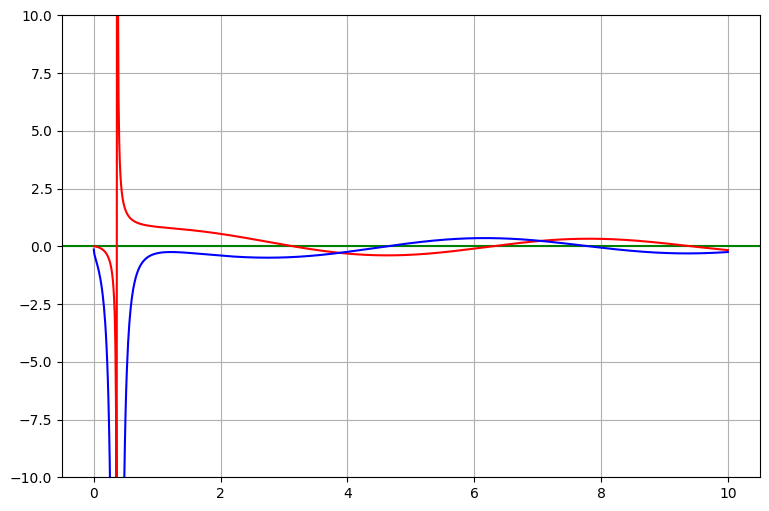

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(9, 6))

plt.axhline(y=0, color='green')
plt.plot(x, fx_v, color='red')
plt.plot(x, fxdx_v, color='blue')
plt.ylim((-10, 10))
plt.grid();

2\. Дана функция $f(x)$. Найдите (используя символьные вычисления) производную данной функции $f'(x)$. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
import sympy as sp

x_sp = sp.symbols('x')
f_sp = sp.sin(x_sp) / (sp.ln(x_sp) + 1); f_sp

sin(x)/(log(x) + 1)

In [ ]:
dfdx_sp = sp.diff(f_sp, x_sp); dfdx_sp

cos(x)/(log(x) + 1) - sin(x)/(x*(log(x) + 1)**2)

<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in log
  return sin(x)/(log(x) + 1)
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return cos(x)/(log(x) + 1) - sin(x)/(x*(log(x) + 1)**2)


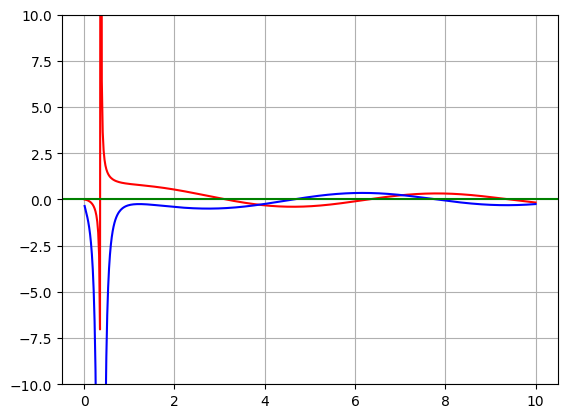

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = np.linspace(-10, 10, 1000)
f_ = sp.lambdify(x, f_sp)
dfdx_ = sp.lambdify(x_sp, dfdx_sp)
plt.plot(a, f_(a), color='red')
plt.plot(a, dfdx_(a), color='blue')
plt.axhline(y=0, color='green')
plt.ylim((-10, 10))
plt.grid();

3\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
def f(x):
  return np.sin(x) / (np.log(x) + 1)

def dfdx(f, x, h=1e-6):
  return (f(x+h) - f(x)) / h

In [ ]:
x = np.linspace(0.0001, 10, 1000)
fx_v = f(x)
fxdx_v = dfdx(f, x)

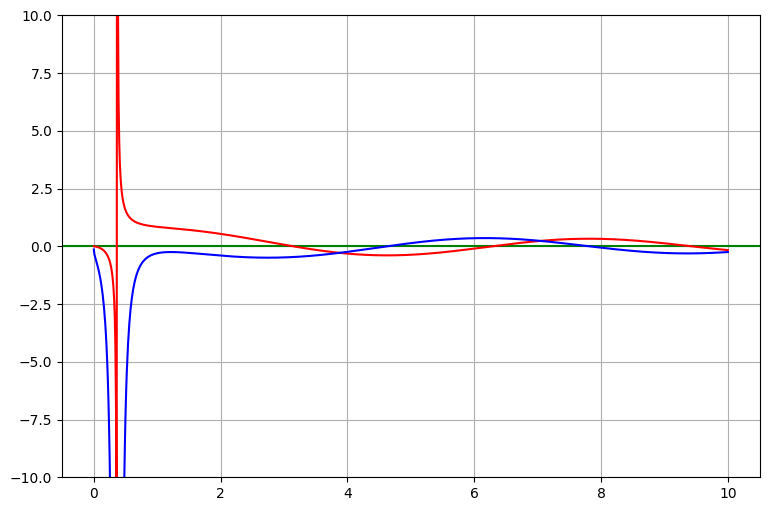

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(9, 6))

plt.axhline(y=0, color='green')
plt.plot(x, fx_v, color='red')
plt.plot(x, fxdx_v, color='blue')
plt.ylim((-10, 10))
plt.grid();

4\. Найдите локальный минимум функции $f(x)$ при помощи метода градиетного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
def f(x):
  return np.sin(x) / (np.log(x) + 1)

def dfdx(x):
  return np.cos(x) / (np.log(x) + 1) - np.sin(x) / (x * (np.log(x) + 1) ** 2)

In [ ]:
x_cur = 4
x0 = 0.00000001
learning_rate = 0.01
gradient = dfdx(x0)

while abs(x0 - x_cur) > 1e-6:
  x0 = x_cur
  x_cur = x_cur - (learning_rate * dfdx(x_cur))
x_cur

4.626984148445977

In [ ]:
x_cur = 9
x0 = 0.00000001
learning_rate = 0.01
gradient = dfdx(x0)

while abs(x0 - x_cur) > 1e-6:
  x0 = x_cur
  x_cur = x_cur + (learning_rate * dfdx(x_cur))
x_cur

7.812420491492213


5\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
import torch as th

In [ ]:
def f_t(x):
  return th.sin(x) / (th.log(x) + 1)

In [ ]:
x = th.linspace(0, 10, steps=1000, requires_grad=True)[1:]
y = f_t(x)
x.retain_grad()
y.backward(th.ones_like(x))
z = x.grad

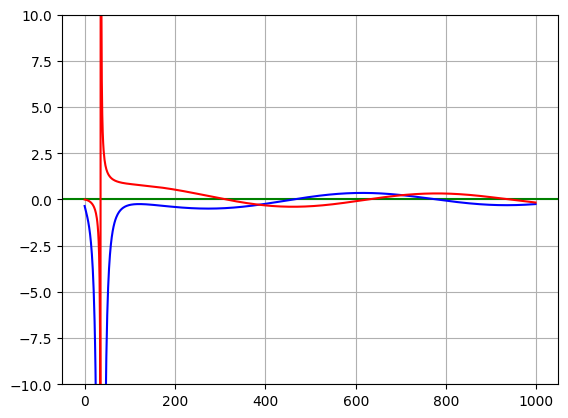

In [ ]:
plt.axhline(y=0, color='green')
plt.plot(z, color='blue')
plt.plot(y.detach().numpy(), color='red')
plt.ylim((-10, 10))
plt.grid();

6\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

In [ ]:
def f6(x):
  return np.sin(np.cos(x))

def df6dx(x):
  return -np.sin(x) * np.cos(np.cos(x))

In [ ]:
X = np.linspace(0, 10, 100)
df6dx_v = df6dx(X)
res1 = df6dx_v
res1[:10]

array([-0.        , -0.05491503, -0.11182205, -0.17250365, -0.23833267,
       -0.31009166, -0.38782511, -0.4707404 , -0.55717349, -0.64463395])

In [ ]:
def f6_t(x):
  return th.sin(th.cos(x))

def df6dx(x):
  return -th.sin(x) * th.cos(th.cos(x))

In [ ]:
X_t = th.linspace(0, 10, 100, requires_grad=True)

In [ ]:
y = f6_t(X_t)
X_t.retain_grad()
y.backward(th.ones_like(X_t))
res2 = X_t.grad
res2[:10]

tensor([-0.0000, -0.0549, -0.1118, -0.1725, -0.2383, -0.3101, -0.3878, -0.4707,
        -0.5572, -0.6446])

In [ ]:
th.abs(res2 - th.tensor(res1)).mean()

tensor(8.4870e-08, dtype=torch.float64)